In [4]:
import pandas as pd
import numpy as np
from math import sqrt

def load_data(file_name):
    """Load data as pandas dataframe
    """
    data = pd.read_csv(file_name, delimiter='\t', header=-1)
    # Split columns
    x = data.iloc[:, 2:]
    y = data[1]
    return x, y

In [5]:
def caculate_jaccard_matrix(cluster):
    matrixs = [[0 for i in range(len(cluster))] for i in range(len(cluster))]
    for i in range(len(cluster)):
        for j in range(len(cluster)):
            if cluster[i] == cluster[j]:
                matrixs[i][j] = 1
    return matrixs

In [6]:
def perform_jaccard_coefficient(truth, cluster):
    """caculate the rand and jaccard index
    :parameter truth: ground truth labels, cluster: the labels from our algorithm
    rtype: rand index(float), jaccard (float)
    """
    same, diff, both_zero = 0, 0, 0
    for idx_x, row in enumerate(truth):
        for idx_y, value in enumerate(row):
            if truth[idx_x][idx_y] == 1 and truth[idx_x][idx_y] == cluster[idx_x][idx_y]:
                same += 1
            elif truth[idx_x][idx_y] != cluster[idx_x][idx_y]:
                diff += 1
            else:
                both_zero += 1
    return (same + both_zero) * 1.0 / (same + both_zero + diff), (same) * 1.0 / (same + diff)

In [68]:
def hierarchical_cluster(data_set, K):
    data_set_target = {key: key for key in range(1, len(data_set) + 1)}
    data_set_cluster = {key: [key] for key in range(1, len(data_set) + 1)}
    distance = list()
    for idxA in range(len(data_set)):
        for idxB in range(len(data_set)):
            if idxA != idxB:
                dist = np.linalg.norm(data_set[idxA] - data_set[idxB])
                distance.append((idxA + 1, (idxB + 1, dist)))
    distance.sort(key=lambda kv: kv[1][1])

    for data in distance:
        A, B = data[0], data[1]
        if data_set_target[A] != data_set_target[B[0]]:
            data_set_cluster[data_set_target[A]].extend(data_set_cluster[data_set_target[B[0]]])
            deleted = data_set_cluster.pop(data_set_target[B[0]], None)
            for key in deleted:
                data_set_target[key] = data_set_target[A]
                
        if len(data_set_cluster) == K:
            return data_set_target.values()


# 1. iyer.txt

In [69]:
x, y = load_data('iyer.txt')
x = np.array(x).astype(np.float)

In [70]:
cluster_labels = hierarchical_cluster(x, 10)

AttributeError: 'list' object has no attribute 'update'

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
data_pca = PCA(n_components=2).fit_transform(x)
fig, ax = plt.subplots()
fig.suptitle('DBSCAN of iter.txt')
for group in np.unique(cluster_labels):
    idx = np.where(cluster_labels == group)
    ax.scatter(data_pca[:, 0][idx], data_pca[:, 1][idx], label = group)
ax.legend(loc=1, ncol=3)
plt.show()

In [ ]:
# Validate clustering results with external index 
cluster_matrixs = caculate_jaccard_matrix(cluster_labels)
ground_truth = caculate_jaccard_matrix(y.tolist())
res = perform_jaccard_coefficient(ground_truth, cluster_matrixs)
print "Rand index: " + str(res[0]) + " Jaccard Coefficient: " + str(res[1])

# 2. cho.txt

In [55]:
x, y = load_data('cho.txt')
x = np.array(x).astype(np.float)

In [56]:
cluster_labels = hierarchical_cluster(x, 5)

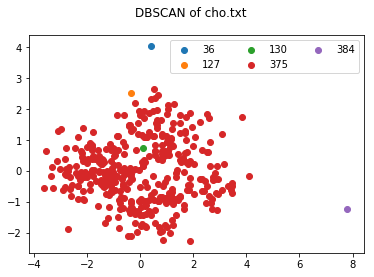

In [57]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
data_pca = PCA(n_components=2).fit_transform(x)
fig, ax = plt.subplots()
fig.suptitle('DBSCAN of cho.txt')
for group in np.unique(cluster_labels):
    idx = np.where(cluster_labels == group)
    ax.scatter(data_pca[:, 0][idx], data_pca[:, 1][idx], label = group)
ax.legend(loc=1, ncol=3)
plt.show()

In [58]:
# Validate clustering results with external index 
cluster_matrixs = caculate_jaccard_matrix(cluster_labels)
ground_truth = caculate_jaccard_matrix(y.tolist())
res = perform_jaccard_coefficient(ground_truth, cluster_matrixs)
print "Rand index: " + str(res[0]) + " Jaccard Coefficient: " + str(res[1])

Rand index: 0.240274906709 Jaccard Coefficient: 0.228394977574
